# Performing linear regression on Olymics in Tokyo dataset-2021

###### Dataset - https://www.kaggle.com/datasets/arjunprasadsarkhel/2021-olympics-in-tokyo?resource=download

## Import Libraries

In [1]:
import numpy as np
import openpyxl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load Dataset (xlsx format)

In [2]:
dataset = openpyxl.load_workbook(r"C:\Users\Admin\Downloads\Medals.xlsx")
sheet = dataset.active

In [3]:
data_set=pd.DataFrame(sheet.values)
data_set.columns = data_set.iloc[0]  # Use the first row as the column headers
data_set = data_set.drop(data_set.index[0])  # Drop the first row
# Reset the index
data_set = data_set.reset_index(drop=True)
print(data_set)
print(data_set.head())
x = data_set.iloc[:,:-1]
y = data_set.iloc[:,-1].astype(float)

0  Rank                    Team/NOC Gold Silver Bronze Total Rank by Total
0     1    United States of America   39     41     33   113             1
1     2  People's Republic of China   38     32     18    88             2
2     3                       Japan   27     14     17    58             5
3     4               Great Britain   22     21     22    65             4
4     5                         ROC   20     28     23    71             3
..  ...                         ...  ...    ...    ...   ...           ...
88   86                       Ghana    0      0      1     1            77
89   86                     Grenada    0      0      1     1            77
90   86                      Kuwait    0      0      1     1            77
91   86         Republic of Moldova    0      0      1     1            77
92   86        Syrian Arab Republic    0      0      1     1            77

[93 rows x 7 columns]
0 Rank                    Team/NOC Gold Silver Bronze Total Rank by Total
0  

## Preprocessing Dataset


In [4]:
#Replacing missing values with mean value
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values = np.nan,strategy = 'mean')
x = data_set.to_numpy()
imputer.fit(x[:,2:5])
# Select the columns (2:5 corresponds to 'Gold', 'Silver', 'Bronze')
x_subset = x[:, 2:5]
imputer.fit(x_subset)

SimpleImputer()

## Encoding Categorical Data 

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(sparse_output=False),[1])],remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [6]:
x

array([[0.0, 0.0, 0.0, ..., '33', '113', '1'],
       [0.0, 0.0, 0.0, ..., '18', '88', '2'],
       [0.0, 0.0, 0.0, ..., '17', '58', '5'],
       ...,
       [0.0, 0.0, 0.0, ..., '1', '1', '77'],
       [0.0, 0.0, 0.0, ..., '1', '1', '77'],
       [0.0, 0.0, 0.0, ..., '1', '1', '77']], dtype=object)

## Split train and test

In [7]:
if hasattr(x, "toarray"):
    x = x.toarray()
    
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

## Create Model

In [8]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Predict and visualising Training set

In [9]:
x_test

array([[0.0, 0.0, 0.0, ..., '17', '58', '5'],
       [0.0, 0.0, 0.0, ..., '1', '5', '42'],
       [0.0, 0.0, 0.0, ..., '2', '4', '47'],
       ...,
       [0.0, 0.0, 0.0, ..., '16', '37', '8'],
       [0.0, 0.0, 0.0, ..., '0', '9', '26'],
       [0.0, 1.0, 0.0, ..., '2', '4', '47']], dtype=object)

In [10]:
y_pred = reg.predict(x_test)

In [11]:
y_pred

array([ 5.0034091 , 41.99994645, 47.00091277, 19.00046946, 18.00162856,
       59.99886508, 65.99862202, 47.00017888, 22.00101601, 76.99869876,
       76.99869876,  9.99977971, 47.00091277, 33.00311177, 16.00036614,
       65.99862202,  7.99861029, 26.00126365, 47.00188738])

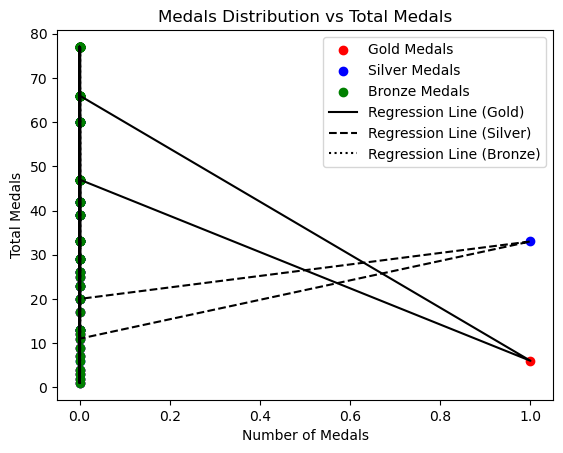

In [16]:
import matplotlib.pyplot as plt
# predicting Total medals based on Gold, Silver, and Bronze
plt.scatter(x_train[:, 2], y_train, color='red', label='Gold Medals')  # Gold medals vs Total
plt.scatter(x_train[:, 3], y_train, color='blue', label='Silver Medals')  # Silver medals vs Total
plt.scatter(x_train[:, 4], y_train, color='green', label='Bronze Medals')  # Bronze medals vs Total
# regression line for each feature
plt.plot(x_train[:, 2], reg.predict(x_train), color='black', label='Regression Line (Gold)')
plt.plot(x_train[:, 3], reg.predict(x_train), color='black', linestyle='--', label='Regression Line (Silver)')
plt.plot(x_train[:, 4], reg.predict(x_train), color='black', linestyle=':', label='Regression Line (Bronze)')

plt.xlabel('Number of Medals')
plt.ylabel('Total Medals')
plt.title('Medals Distribution vs Total Medals')
plt.legend()
plt.show()


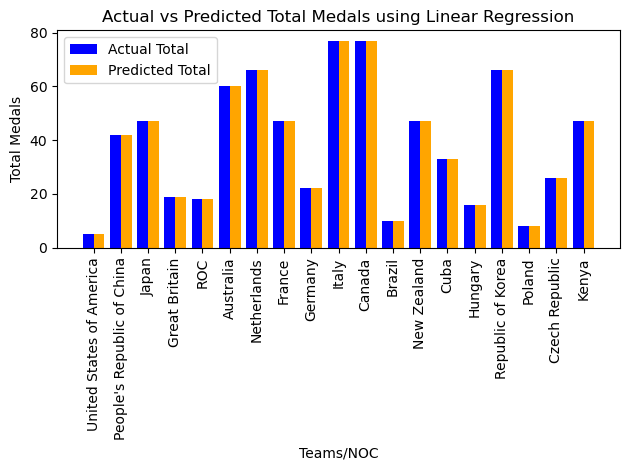

In [19]:
# predictions on the test set
y_pred = reg.predict(x_test)
# Assuming 'data_set' has all teams and is aligned with your features
teams = data_set['Team/NOC'].values  # Original data
# Assuming the first column of x_test corresponds to the team indices
# Update this if necessary to ensure it gets the right indices
# Make sure you have a mapping of team names in your features
# If you encoded categorical features, you might need to adjust this accordingly
test_indices = np.arange(len(y_pred))  # Since y_pred has predictions for all test samples
selected_teams = teams[test_indices]  # Get the team names for the test set

# Plotting actual vs predicted total medals
x_indices = np.arange(len(selected_teams))  # Update to the length of selected teams

plt.bar(x_indices - 0.2, y_test, width=0.4, label='Actual Total', color='blue')
plt.bar(x_indices + 0.2, y_pred, width=0.4, label='Predicted Total', color='orange')

plt.xticks(x_indices, selected_teams, rotation=90)  # Update to selected teams
plt.xlabel('Teams/NOC')
plt.ylabel('Total Medals')
plt.title('Actual vs Predicted Total Medals using Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()
